**Fase 3: Visualizando los datos.**

El objetivo de esta fase será proporcionar a **ABC Corporation** un informe detallado del contexto general de la empresa utilizando visualizaciones en Python. Este informe permitirá una comprensión más profunda de la situación actual y servirá como base para la toma de decisiones informadas.

Deberás generar **un informe completo que incluirá las visualizaciones junto con análisis descriptivos (se presentará el día de la demo)**. Las visualizaciones ayudarán a resaltar **tendencias, áreas de mejora y fortalezas dentro de la empresa**.

In [39]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [40]:
# Ejemplo: Si el CSV estuviera un nivel arriba de la carpeta ETL
df = pd.read_csv("../files/raw_data_limpio.csv") # abrir archivo csv limpio tras transformaciones

In [41]:
df

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,datebirth,salary,remotework
0,51,no,non-travel,2015.72,research & development,6,3,unknown,1,1,m,251.96500,3,5,research director,3,unknown,16280.830000,42330.17,7,no,13,3.0,3,full time,0,NaN,5,3.0,20,15,15,1972,195370.00,yes
1,52,no,non-travel,2063.39,unknown,1,4,life sciences,2,3,m,257.92375,2,5,manager,3,unknown,16665.833333,43331.17,0,unknown,14,3.0,1,full time,1,34.0,5,3.0,33,11,9,1971,199990.00,yes
2,42,no,travel_rarely,1984.25,unknown,4,2,technical degree,3,3,m,248.03125,3,5,manager,4,married,16026.666667,41669.33,1,no,11,3.0,4,full time,0,22.0,3,3.0,22,11,15,1981,192320.00,yes
3,47,no,travel_rarely,1771.40,research & development,2,4,medical,4,1,f,221.42500,3,4,research director,3,married,14307.500000,37199.50,3,unknown,19,3.0,2,full time,2,NaN,2,3.0,20,5,6,1976,171690.00,no
4,46,no,non-travel,1582.77,sales,3,3,technical degree,5,1,f,197.84625,4,4,sales executive,1,divorced,12783.920000,33238.20,2,no,12,3.0,4,full time,1,NaN,5,3.0,19,2,8,1977,153407.04,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609,36,yes,travel_rarely,1065.28,sales,3,1,life sciences,1610,3,m,133.16000,2,3,sales executive,4,married,8604.170000,22370.83,1,unknown,11,NaN,1,full time,1,NaN,6,3.0,16,3,7,1987,103250.00,no
1610,45,no,non-travel,458.82,research & development,4,2,unknown,1611,3,m,57.35250,3,2,laboratory technician,2,unknown,3705.830000,9635.17,1,unknown,12,3.0,2,part time,0,NaN,5,2.0,9,0,8,1978,44470.00,yes
1611,39,no,travel_rarely,1032.49,sales,13,5,unknown,1612,1,m,129.06125,4,3,sales executive,3,single,8339.320000,21682.23,0,no,18,3.0,4,part time,0,9.0,3,3.0,8,0,7,1984,100071.84,yes
1612,36,no,non-travel,556.26,sales,8,4,technical degree,1613,1,m,69.53250,3,2,sales executive,4,divorced,4492.840000,11681.39,4,no,13,NaN,4,part time,2,12.0,3,3.0,7,0,7,1987,53914.11,yes


In [42]:
# Paleta rosa (Material Design Pink)
paleta_rosas = [
    "#880E4F",  # rosa muy oscuro
    "#AD1457",
    "#C2185B",
    "#D81B60",
    "#E91E63",  # rosa principal
    "#F06292",
    "#F48FB1",
    "#F8BBD0",
    "#FCE4EC"   # rosa muy claro
]


In [43]:
from matplotlib.colors import LinearSegmentedColormap  # Usamos from matplotlib.colors import LinearSegmentedColormap para crear mapas de colores (colormaps) personalizados en Matplotlib
cmap_rosas = LinearSegmentedColormap.from_list("rosas", paleta_rosas)

In [44]:
sns.set_theme(style="whitegrid", palette=paleta_rosas) # Esa línea de código, sns.set_theme(style="whitegrid", palette=paleta_rosas),se utiliza para configurar el estilo visual predeterminado de los gráficos generados con la librería Seaborn

In [45]:
df.head(5)

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,datebirth,salary,remotework
0,51,no,non-travel,2015.72,research & development,6,3,unknown,1,1,m,251.96500,3,5,research director,3,unknown,16280.830000,42330.17,7,no,13,3.0,3,full time,0,NaN,5,3.0,20,15,15,1972,195370.00,yes
1,52,no,non-travel,2063.39,unknown,1,4,life sciences,2,3,m,257.92375,2,5,manager,3,unknown,16665.833333,43331.17,0,unknown,14,3.0,1,full time,1,34.0,5,3.0,33,11,9,1971,199990.00,yes
2,42,no,travel_rarely,1984.25,unknown,4,2,technical degree,3,3,m,248.03125,3,5,manager,4,married,16026.666667,41669.33,1,no,11,3.0,4,full time,0,22.0,3,3.0,22,11,15,1981,192320.00,yes
3,47,no,travel_rarely,1771.40,research & development,2,4,medical,4,1,f,221.42500,3,4,research director,3,married,14307.500000,37199.50,3,unknown,19,3.0,2,full time,2,NaN,2,3.0,20,5,6,1976,171690.00,no
4,46,no,non-travel,1582.77,sales,3,3,technical degree,5,1,f,197.84625,4,4,sales executive,1,divorced,12783.920000,33238.20,2,no,12,3.0,4,full time,1,NaN,5,3.0,19,2,8,1977,153407.04,no


### 1. Distribución de Atrición ('attrition')

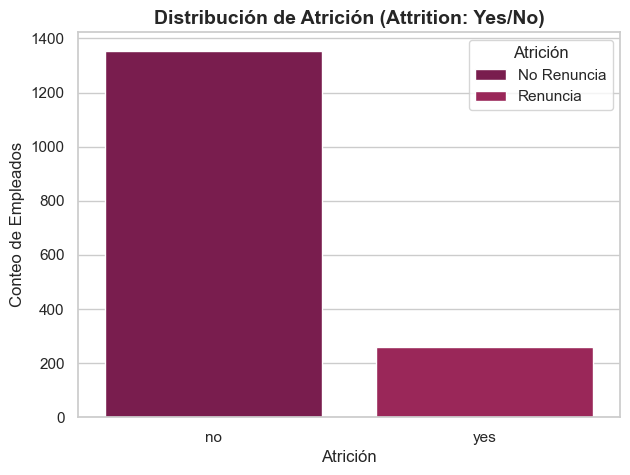

In [46]:
# 1. Crear la figura para el gráfico
plt.figure(figsize=(7, 5))

# 2. Generar el gráfico de conteo (countplot)
sns.countplot(
    data=df,         # Especifica el DataFrame 'df' que contiene los datos.
    x='attrition',   # Define la columna que se va a contar en el eje X.
                     # En este caso, cuenta cuántos 'Yes' y 'No' hay en la columna 'attrition'.
    hue='attrition'  # Usa la misma columna para diferenciar los colores de las barras.
                     # Esto hace que cada barra (Yes y No) tenga un color distinto.
)
# El 'countplot' de Seaborn es ideal para visualizar la distribución de una variable categórica.

# 3. Personalizar los títulos y etiquetas
plt.title('Distribución de Atrición (Attrition: Yes/No)', fontsize=14, fontweight='bold')
plt.xlabel('Atrición')
plt.ylabel('Conteo de Empleados')

# 4. Configurar la leyenda
plt.legend(
    title='Atrición',           # Título de la caja de la leyenda.
    labels=['No Renuncia', 'Renuncia'] # Asigna etiquetas más descriptivas a los colores
                                         # (asumiendo que el primer color es 'No' y el segundo es 'Yes').
)

# 5. Mostrar el gráfico
plt.show()


In [47]:
valores_unicos_job_role = df[df['department'] == 'unknown']['jobrole'].unique()

In [48]:
valores_unicos_job_role

array(['manager'], dtype=object)

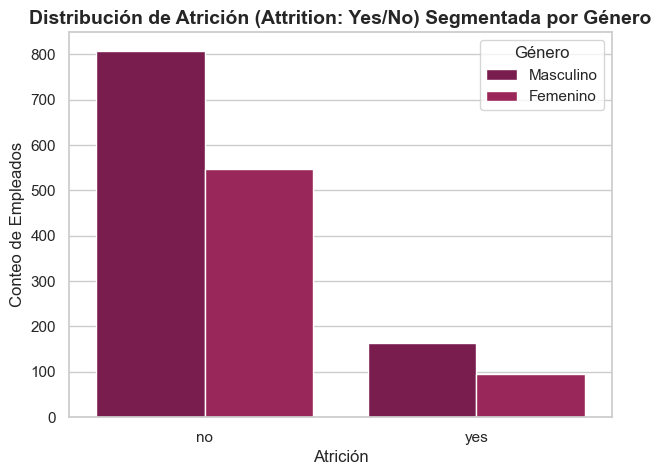

In [49]:
# 1. Crear la figura para el gráfico
plt.figure(figsize=(7, 5))

# 2. Generar el gráfico de conteo (countplot) segmentado
sns.countplot(
    data=df,         # Especifica el DataFrame 'df' que contiene los datos de los empleados.
    x='attrition',   # Define la variable principal a contar en el eje X (Atrición: 'Yes' o 'No').
    hue='gender'     # Esta es la clave: segmenta las barras de 'attrition' (eje X)
                     # en dos sub-barras, una por cada categoría de la variable 'gender'.
                     # Esto permite comparar la atrición entre hombres y mujeres.
)

# 3. Personalizar los títulos y etiquetas
plt.title('Distribución de Atrición (Attrition: Yes/No) Segmentada por Género', fontsize=14, fontweight='bold')
plt.xlabel('Atrición')
plt.ylabel('Conteo de Empleados')

# 4. Configurar la leyenda
plt.legend(
    title='Género',           # Título de la leyenda para indicar qué representa el color.
    labels=['Masculino', 'Femenino'] # Asigna etiquetas descriptivas a los colores de las barras
                                      # (asumiendo este orden en los datos originales).
)

# 5. Mostrar el gráfico
plt.show()


Este gráfico muestra la proporción entre los empleados que **permanecen en la empresa y los que deciden irse**.

Se aprecia que la mayoría de los trabajadores optan por **no dejar la organización**, ya que la barra correspondiente a 'sí' es notablemente más baja. Esto sugiere que, pese a existir cierta rotación, la tendencia principal es la **permanencia del personal**. 

### 2. Atrición por departamento: 

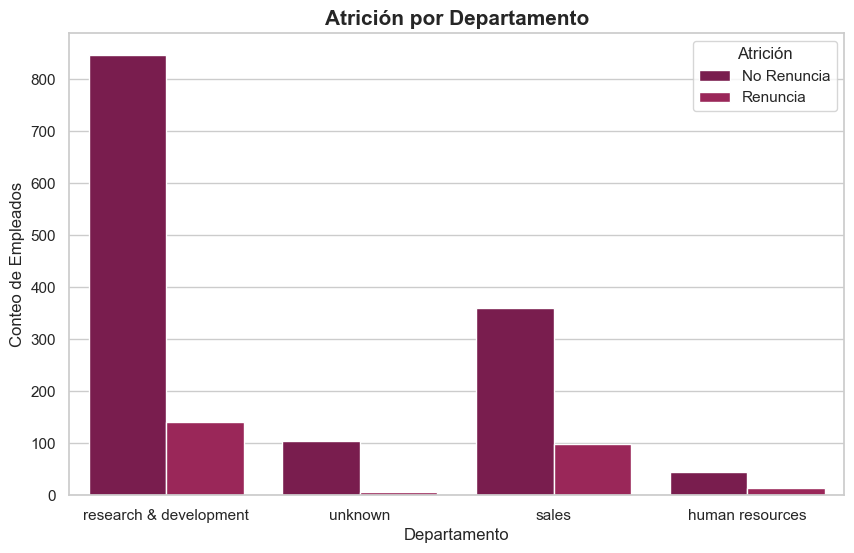

In [50]:
# 1. Crear la figura  para el gráfico
plt.figure(figsize=(10, 6))

# 2. Generar el gráfico de conteo (countplot) segmentado
sns.countplot(
    data=df,         # Especifica el DataFrame 'df' a utilizar.
    x='department',  # Define la variable categórica principal a contar en el eje X (los departamentos).
    hue='attrition'  # Segmenta cada barra de departamento en dos:
                     # una sub-barra para los que 'No Renuncian' y otra para los que 'Renuncian'.
                     # Esto permite comparar las tasas de atrición dentro de cada departamento.
)

# 3. Personalizar los títulos y etiquetas
plt.title('Atrición por Departamento', fontsize=15, fontweight='bold')
plt.xlabel('Departamento')
plt.ylabel('Conteo de Empleados')

# 4. Configurar la leyenda
plt.legend(
    title='Atrición',           # Título de la leyenda.
    labels=['No Renuncia', 'Renuncia'] # Asigna etiquetas descriptivas a los colores.
)

# 5. Mostrar el gráfico
plt.show()


In [51]:
df['department'].value_counts()

department
research & development    987
sales                     459
unknown                   111
human resources            57
Name: count, dtype: int64

El departamento con mayor cantidad de empleados, y a la vez, con una atrición significativa es 'Research & Development'. Y aunque 'Sales' tiene menos empleados, la proporción de renuncias es más alta. Por último 'Human Resources' que, aunque es un departamento pequeño, tiene una tasa de atrición preocupante en relación con su tamaño. 

____

### 3. Tasa de Rotación por Rol de Trabajo: 

In [52]:
# Cálculo de la tasa de rotación por Jobrole:
# Agrupar por Jobrole y contar las proporciones de Attrition
proporcion_rotacion_rol = df.groupby('jobrole')['attrition'].value_counts(normalize=True).mul(100)

# Convertir la Serie a un DataFrame
df_attrition_rol = proporcion_rotacion_rol.rename('percent').reset_index()

# Filtrar solo por la rotación ('yes')
df_attrition_rol = df_attrition_rol[df_attrition_rol['attrition'] == 'yes']

# 2. Ordenar los datos
# Ordenar el DataFrame para que el rol con MAYOR rotación aparezca primero.
df_attrition_rol = df_attrition_rol.sort_values(by='percent', ascending=False)

In [53]:
df_attrition_rol.head(2)

,jobrole,attrition,percent
17,sales representative,yes,37.777778
5,laboratory technician,yes,23.741007


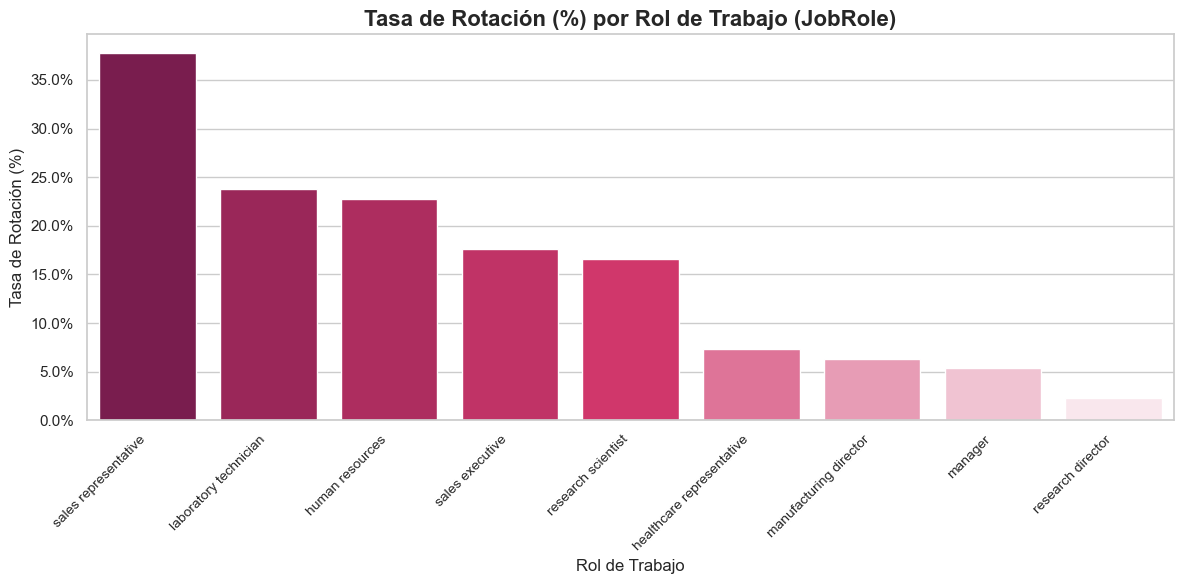

In [54]:
paleta_rosas = [
 '#880E4F', '#AD1457', '#C2185B', '#D81B60', '#E91E63', 
    '#F06292', '#F48FB1', '#F8BBD0', '#FCE4EC'
]

# Aseguramos que la paleta tenga la longitud correcta
num_roles = len(df_attrition_rol['jobrole'].unique())
paleta_final = paleta_rosas[:num_roles] 

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6)) 

# Creación del Barplot con las correcciones para evitar el FutureWarning
sns.barplot(
    x='jobrole',
    y='percent',
    data=df_attrition_rol,
    # 1. CORRECCIÓN CLAVE: Usar 'jobrole' para colorear
    hue='jobrole', 
    palette=paleta_final,
    # 2. CORRECCIÓN CLAVE: Desactivar la leyenda duplicada
    legend=False 
)

plt.title('Tasa de Rotación (%) por Rol de Trabajo (JobRole)', fontsize=16, weight='bold')
plt.xlabel('Rol de Trabajo', fontsize=12)
plt.ylabel('Tasa de Rotación (%)', fontsize=12)

# Ajustar las etiquetas del eje X para que sean legibles
plt.xticks(rotation=45, ha='right', fontsize=10) 

# Formatear el eje Y para mostrar el porcentaje
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.1f}%'))

plt.tight_layout()
plt.show()

Como hemos visto, tras la limpieza de los datos, hemos realizado una serie de cruces y visualizaciones para entender las dinámicas internas de la compañía. 
Nuestros hallazgos no solo revelan tendencias, sino que apuntan a una dirección estratégica muy clara.

  1. La Fuga de Talento está Concentrada:

Como pueden ver, 5 de nuestros 9 departamentos están en modo puerta giratoria, con tasas de rotación que hacen pensar que algo está empujando a los empleados a buscar nuevos horizontes.

Gráfico de frecuencia de rotación por departamento guardado como attrition_frequency_by_department.png


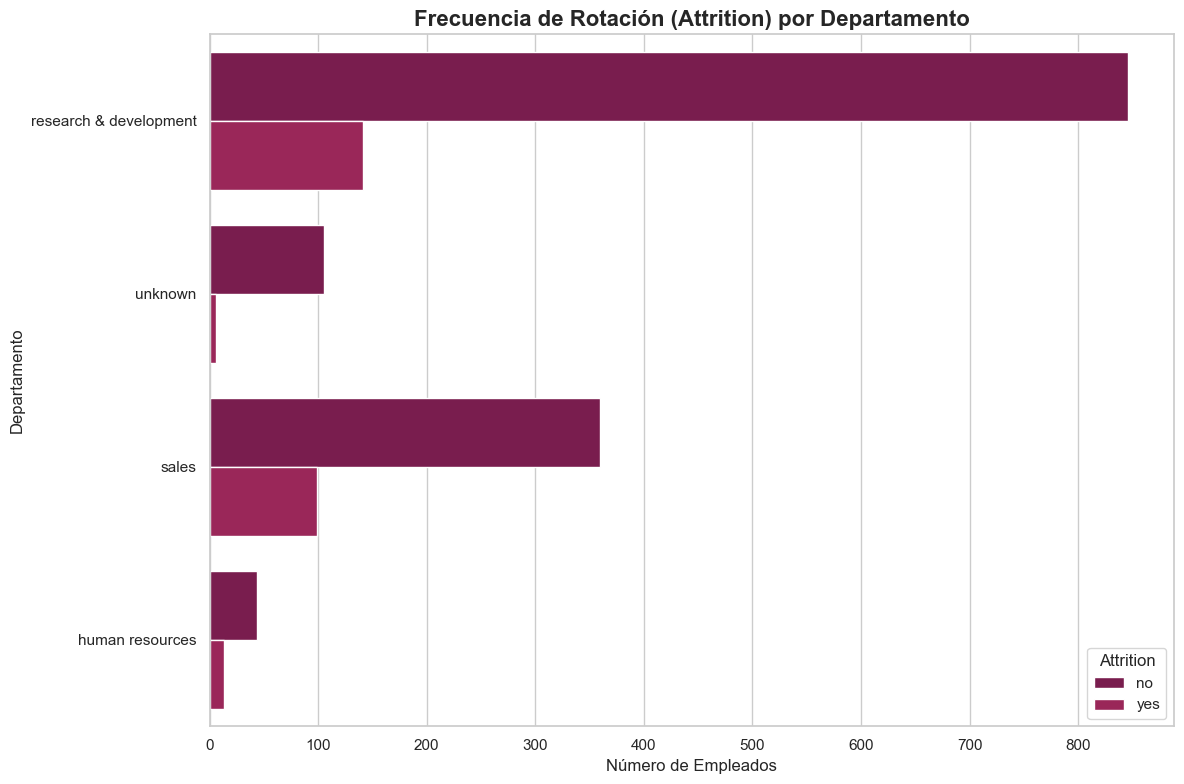

In [60]:
# 1. Crear la figura  para el gráfico
plt.figure(figsize=(12, 8))

# 2. Generar el gráfico de conteo (countplot) segmentado
sns.countplot(
    y='department',  # **¡Clave!** Coloca la variable categórica (Departamentos) en el EJE Y,
                     # lo que resulta en un gráfico de barras horizontales.
    hue='attrition', # Segmenta cada barra de departamento en dos: 'Renuncia' y 'No Renuncia'.
    data=df          # Especifica el DataFrame 'df' a utilizar.
)

# 3. Personalizar los títulos y etiquetas
plt.title('Frecuencia de Rotación (Attrition) por Departamento', fontsize=16, fontweight='bold')
plt.xlabel('Número de Empleados')
plt.ylabel('Departamento')
plt.legend(title='Attrition')

# 4. Ajustar el diseño y guardar
plt.tight_layout()
plt.savefig('attrition_frequency_by_department.png')

print('Gráfico de frecuencia de rotación por departamento guardado como attrition_frequency_by_department.png')


Otra forma de visualizar esta rotación puede ser el siguiente gráfico.
Muestra claramente la cantidad de empleados que rotaron frente a los que no en cada departamento. 

Se puede observar que el departamento de "research & development" es el más grande en términos  de número de empleados, pero también parece tener la mayor cantidad de rotación en números absolutos. 

Pero para comparar la "tasa" de rotación entre departamentos de diferentes tamaños, sería más justo visualizar los porcentajes

Gráfico de porcentaje de rotación guardado como attrition_percentage_by_department.png


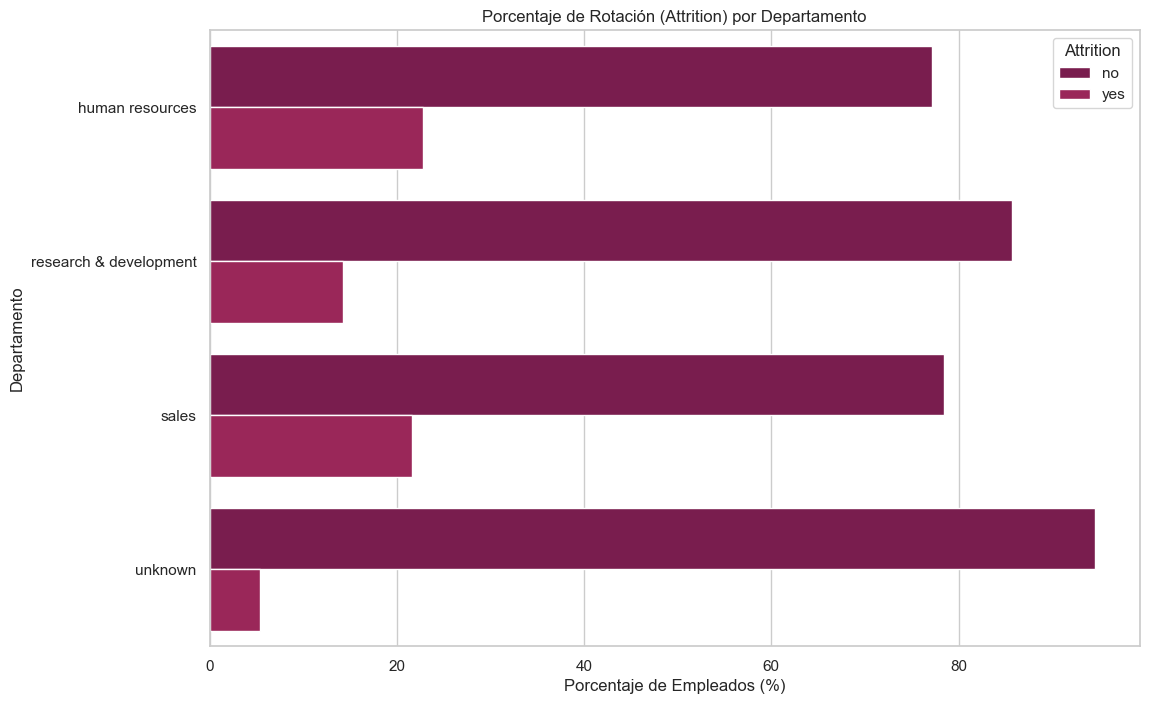

In [61]:
# Calcular el porcentaje de rotación por departamento9 
# 1. Agrupar por departamento y contar los valores de 'attrition'
# 2. Usar normalize=True para obtener la proporción
# 3. Multiplicar por 100 y resetear el índice para convertirlo en un DataFrame
attrition_perc = df.groupby('department')['attrition'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()

# Crear la figura para el gráfico
plt.figure(figsize=(12, 8))

# Generar el gráfico de barras usando los datos calculados
sns.barplot(x='percentage', y='department', hue='attrition', data=attrition_perc)

# Configurar título y etiquetas
plt.title('Porcentaje de Rotación (Attrition) por Departamento')
plt.xlabel('Porcentaje de Empleados (%)')
plt.ylabel('Departamento')
plt.legend(title='Attrition')

# Guardar el gráfico
plt.savefig('attrition_percentage_by_department.png')

print("Gráfico de porcentaje de rotación guardado como attrition_percentage_by_department.png")

Así que, hemos metido en el mix este gráfico que nos regala una perspectiva fresquísima y más útil que solo contar cabezas:

 `Sales`: Lidera la carrera de la rotación, superando el 20%.

 `human resources`: Le pisa los talones, con una rotación también cercana al 20%.

`Research & Development`: Aunque pierde más empleados en bruto, tiene la tasa de rotación más baja, rondando el 15%.

  Conclusión:

Al ajustar los datos y mirar los porcentajes, concluimos que los departamentos de "Sales" y "human resources" tienen un probrema de rotación proporcionalmente mayor.

Esto nos ayuda a afinar la puntería para saber donde las estrategias de retención de talento son más urgentes.

___

### 4. Rotación en empleados con y sin trabajo remoto:

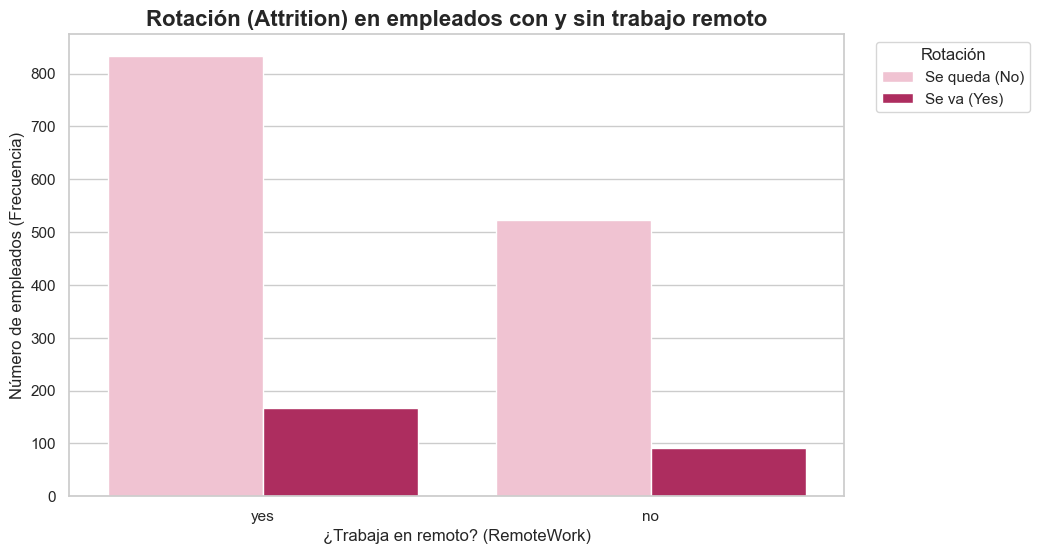

In [56]:
PALETA_REMOTE = {
    'yes': '#C2185B', # Rosa oscuro (para Attrition = 'Yes')
    'no': '#F8BBD0'   # Rosa claro (para Attrition = 'No')
}

# 1. Configurar el estilo del gráfico (Seaborn)
sns.set_style("whitegrid")

# 2. Crear la figura (lienzo) para el gráfico
plt.figure(figsize=(10, 6))

# 3. Generar el gráfico de conteo (countplot) segmentado
sns.countplot(
    x='remotework',    # Define la variable en el eje X: si el empleado trabaja en remoto ('Yes' o 'No').
    hue='attrition',   # Segmenta las barras del eje X según la variable 'attrition' ('Yes' o 'No').
                       # Esto permite comparar cuántos empleados renuncian y cuántos se quedan,
                       # tanto en el grupo de teletrabajadores como en el presencial.
    data=df,           # Especifica el DataFrame 'df' a utilizar.
    palette=PALETA_REMOTE # Utiliza una paleta de colores personalizada (previamente definida)
                          # para distinguir los grupos de rotación.
)

# 4. Personalizar los títulos y etiquetas
plt.title('Rotación (Attrition) en empleados con y sin trabajo remoto', fontsize=16, weight='bold')
plt.xlabel('¿Trabaja en remoto? (RemoteWork)', fontsize=12)
plt.ylabel('Número de empleados (Frecuencia)', fontsize=12)

# 5. Configurar la leyenda
plt.legend(
    title='Rotación',                # Título de la leyenda.
    labels=['Se queda (No)', 'Se va (Yes)'], # Etiquetas descriptivas para los colores de las barras.
    loc='upper right',               # Posiciona la leyenda en la esquina superior derecha del área del gráfico.
    bbox_to_anchor=(1.25, 1)         # Desplaza la leyenda fuera del área principal del gráfico (a la derecha)
                                     # para evitar que oculte las barras.
)

# 6. Mostrar el gráfico
plt.show()


___

### 5. Atrición por Antigüedad en la Empresa:

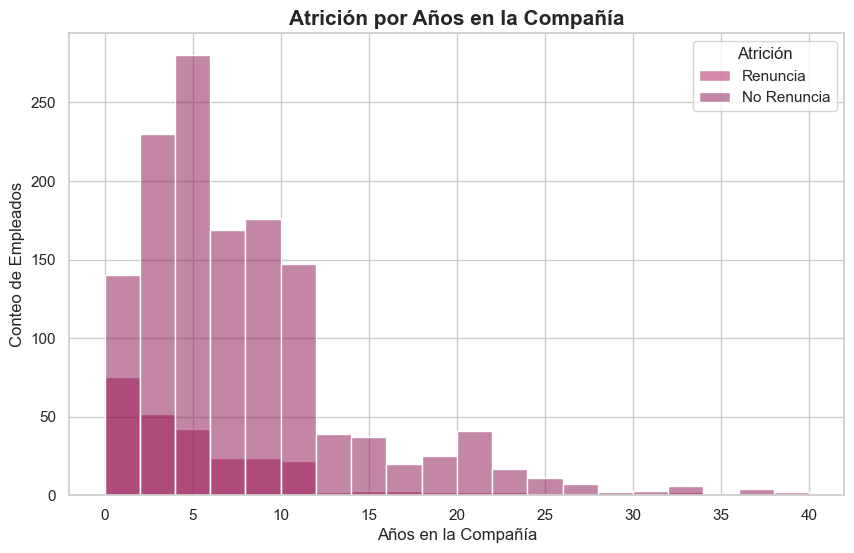

In [57]:
# 1. Crear la figura (lienzo) para el gráfico
plt.figure(figsize=(10, 6))

# 2. Generar el histograma (histplot)
sns.histplot(
    data=df,         # Especifica el DataFrame 'df' a utilizar.
    x='yearsatcompany', # Define la variable numérica cuya distribución se va a mostrar en el eje X.
    hue='attrition',    # Segmenta el histograma en dos distribuciones superpuestas,
                        # una para los que 'Renuncian' y otra para los que 'No Renuncian'.
                        # Esto permite comparar visualmente las formas de las distribuciones.
    bins=20             # Especifica el número de contenedores (bins) en los que se dividirá
                        # el rango de 'yearsatcompany'. Usar 20 da una buena resolución para
                        # ver los picos y valles de la distribución.
)

# 3. Personalizar los títulos y etiquetas
plt.title('Atrición por Años en la Compañía', fontsize=15, fontweight='bold')
plt.xlabel('Años en la Compañía')
plt.ylabel('Conteo de Empleados')

# 4. Configurar la leyenda
plt.legend(
    title='Atrición',           # Título de la leyenda.
    # Nota: El orden de las etiquetas en 'histplot' puede ser diferente al de 'countplot'.
    # Si Seaborn ordena las categorías alfabéticamente ('No', 'Yes'), 'Renuncia' (Yes)
    # puede aparecer primero en la leyenda si el color de 'Yes' es el primero.
    labels=['Renuncia', 'No Renuncia'] # Se ajusta el orden de las etiquetas, pero la
                                       # correspondencia de color debe ser verificada
                                       # en el gráfico generado.
)

# 5. Mostrar el gráfico
plt.show()

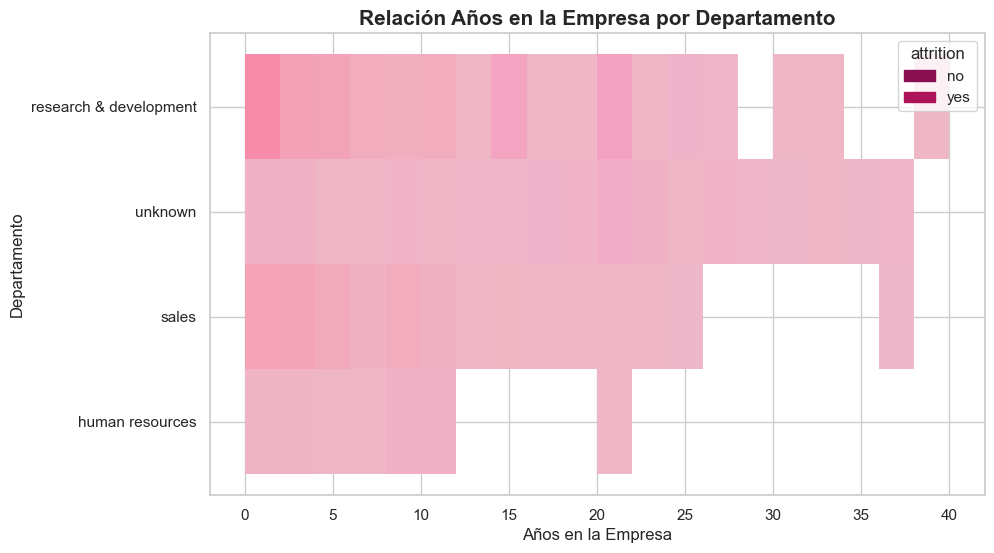

In [59]:
# 1. Crear la figura 
plt.figure(figsize=(10, 6))

# 2. Generar el Gráfico (Mapa de Calor Segmentado, Heatmap)
sns.histplot(
    data=df,         # Especifica el DataFrame 'df'.
    x='yearsatcompany', # Eje X: La variable numérica se discretizará en 'bins' (contenedores/rangos).
    y='department',  # Eje Y: La variable categórica (Departamentos).
    hue='attrition', # Segmenta o separa el conteo de frecuencias por 'attrition' ('Yes' o 'No').
                     # Esto causará problemas o una visualización poco clara con histplot estándar.
    bins=20          # Número de rangos para la variable 'yearsatcompany'.
)

# 3. Personalizar los títulos y etiquetas
plt.title('Relación Años en la Empresa por Departamento', fontsize=15, fontweight='bold')
plt.xlabel('Años en la Empresa')
plt.ylabel('Departamento')

# 4. Mostrar el gráfico
plt.show()


Conlusiones principales: 

- La mayoría de los empleados permanecen en la empresa, lo que indica **estabilidad laboral**. Recomendación: Mantener las políticas que favorecen la retención, pero sin descuidar los focos de atrición. 

- 'Research & Development' es el departamento con **más empleados y más renuncias en términos absolutos**. Recomendación: Investigar las causas. ¿Falta de crecimiento, salarios, carga laboral o falta de reconocimiento?

- 'Sales' tiene una **alta proporción de renuncias** (casi 1 de cada 4 empreados se va). Recomendación: Analizar condiciones laborales. ¿Comisiones, presión, falta de equilibrio vida-trabajo?

- 'Human Resources' aunque es pequeño, su **tasa de atrición es preocupante**. Recomendación: Priorizar la retención en este departamento. ¿Liderazgo, clima laboral, oportunidades de desarrollo? 

- Los datos 'Unknown' representan información mal clasificada o irrelevante. Recomendación: Revisar y corregir la fuente de datos para evitar sesgos en el análisis. 

_____

### 6. Ingreso Mensual ('monthlyincome') por Departamento ('department')

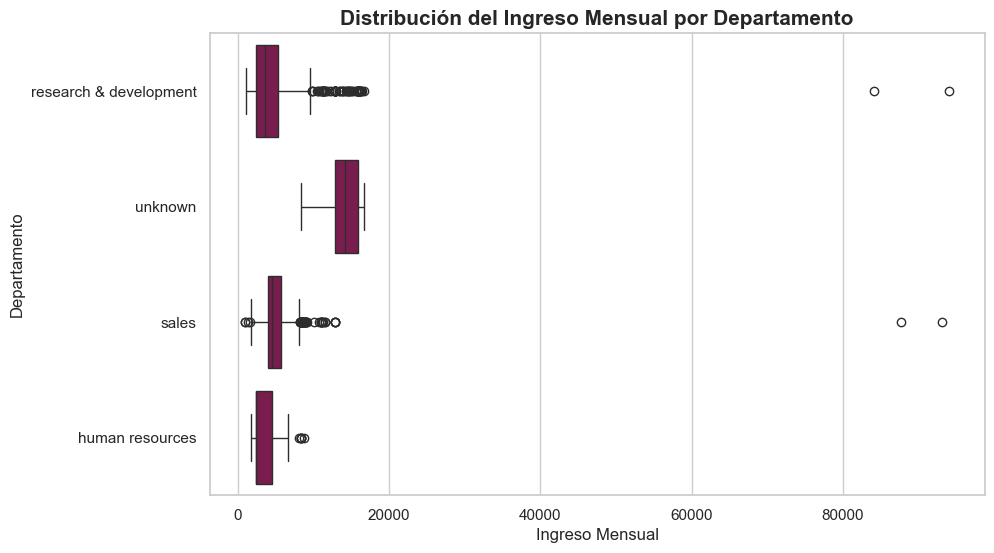

In [62]:
# 1. Crear la figura para el gráfico
plt.figure(figsize=(10, 6))

# 2. Generar el gráfico de caja (boxplot)
sns.boxplot(
    data=df,         # Especifica el DataFrame 'df'.
    x='monthlyincome', # Define la variable numérica cuya distribución se va a analizar en el EJE X.
                       # En este caso, el ingreso mensual.
    y='department'   # Define la variable categórica para segmentar la distribución en el EJE Y.
                     # Se crea una caja de bigotes separada para cada departamento.
)

# 3. Personalizar los títulos y etiquetas
plt.title('Distribución del Ingreso Mensual por Departamento', fontsize=15, fontweight='bold')
plt.xlabel('Ingreso Mensual')
plt.ylabel('Departamento')

# 4. Mostrar el gráfico
plt.show()


Este diagrama de cajas compara la distribución salarial en los principales departamentos. 

Se puede ver que los trabajadores en los departamentos de 'Research & Development y Sales' tienen una distribución de ingresos bastante amplia, con muchos empleados en rangos salariales medios. 

Conclusiones: 

- Desigualdad salarial en 'Research & Development' y 'Sales'

- La mayoría de los empleados de tienen ingresos bajos, pero unos pocos alcanzan ingresos muy altos (hasta ~100,000). Esto sugiere un sistema de compensación basado en comisiones o bonos, lo que podría generar insatisfacción en el equipo si no todos tienen las mismas oportunidades.

- Research & Development tiene los ingresos promedio más altos, pero también una gran variabilidad. Esto podría reflejar diferencias entre roles (ej: junior vs. senior) o inequidades en la compensación.

- Human Resources tiene los ingresos más bajos y menos dispersos, lo que podría explicar su alta tasa de atrición (como vimos en la gráfica anterior). Si los salarios no son competitivos, los empleados pueden buscar oportunidades en otras empresas.

- Outliers:

        Los valores atípicos (outliers) en Sales y R&D podrían corresponder a puestos directivos o empleados con bonos excepcionales. Es importante analizar si estos casos son justos o generan descontento en el equipo.


In [78]:
# Definición de la función para eliminar valores atípicos (outliers)
def remove_outliers(df, column):
    # La función toma el DataFrame (df) y el nombre de la columna (column) a limpiar.

    # 1. Calcular el Primer Cuartil (Q1)
    Q1 = df[column].quantile(0.25)
    # Q1 es el valor debajo del cual se encuentra el 25% de los datos de la columna.

    # 2. Calcular el Tercer Cuartil (Q3)
    Q3 = df[column].quantile(0.75)
    # Q3 es el valor debajo del cual se encuentra el 75% de los datos (o el 25% superior).

    # 3. Calcular el Rango Intercuartílico (IQR)
    IQR = Q3 - Q1
    # IQR es la diferencia entre Q3 y Q1. Representa el rango donde se encuentra el 50% central de los datos. 

    # 4. Calcular el Límite Inferior (Lower Bound) para los outliers
    lower_bound = Q1 - 1.5 * IQR
    # Los valores menores que este límite se consideran outliers inferiores.
    # El factor 1.5 es una convención estadística estándar.

    # 5. Calcular el Límite Superior (Upper Bound) para los outliers
    upper_bound = Q3 + 1.5 * IQR
    # Los valores mayores que este límite se consideran outliers superiores.

    # 6. Filtrar y devolver el DataFrame limpio
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    # La función devuelve un nuevo DataFrame que contiene solo las filas
    # donde el valor de la columna está DENTRO de los límites (entre lower_bound y upper_bound).
    # Las filas con outliers son eliminadas del resultado.

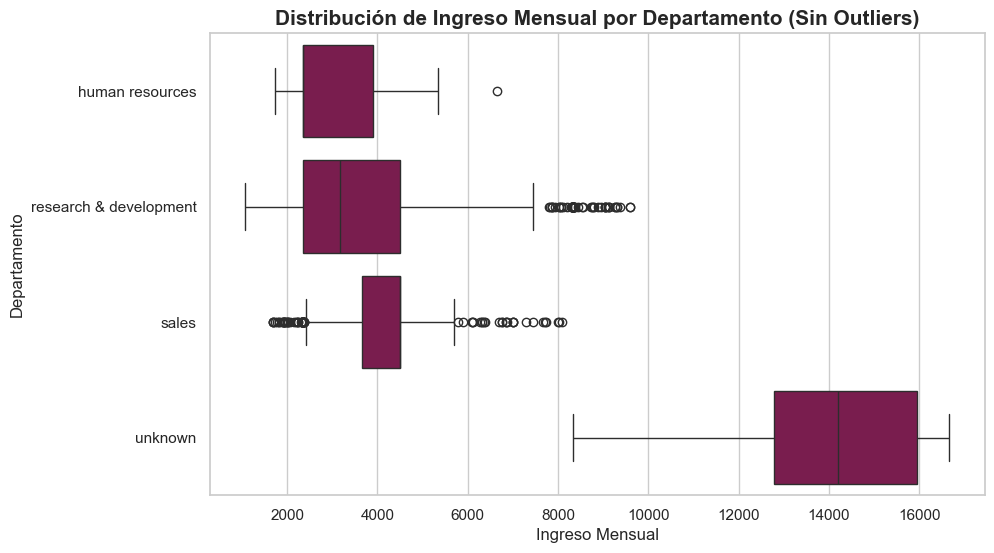

In [79]:
# 1. Aplicar la función de eliminación de outliers por grupo
df_sin_outliers = df.groupby('department').apply(
    lambda x: remove_outliers(x, 'monthlyincome')
).reset_index(drop=True)
# El resultado es un DataFrame 'df_sin_outliers' mucho más limpio y listo para la visualización.

# 2. Crear la figura (lienzo) para el gráfico
plt.figure(figsize=(10, 6))

# 3. Generar el gráfico de caja (boxplot) con los datos limpios
sns.boxplot(
    data=df_sin_outliers, # **¡Usa el DataFrame limpio!** La distribución del ingreso
                          # ahora estará libre de los puntos extremos.
    x='monthlyincome',
    y='department'
)

# 4. Personalizar los títulos y etiquetas
plt.title('Distribución de Ingreso Mensual por Departamento (Sin Outliers)', fontsize=15, fontweight='bold')
plt.xlabel('Ingreso Mensual')
plt.ylabel('Departamento')

# 5. Mostrar el gráfico
plt.show()


Gráfico de violín guardado como income_department_attrition_violin.png


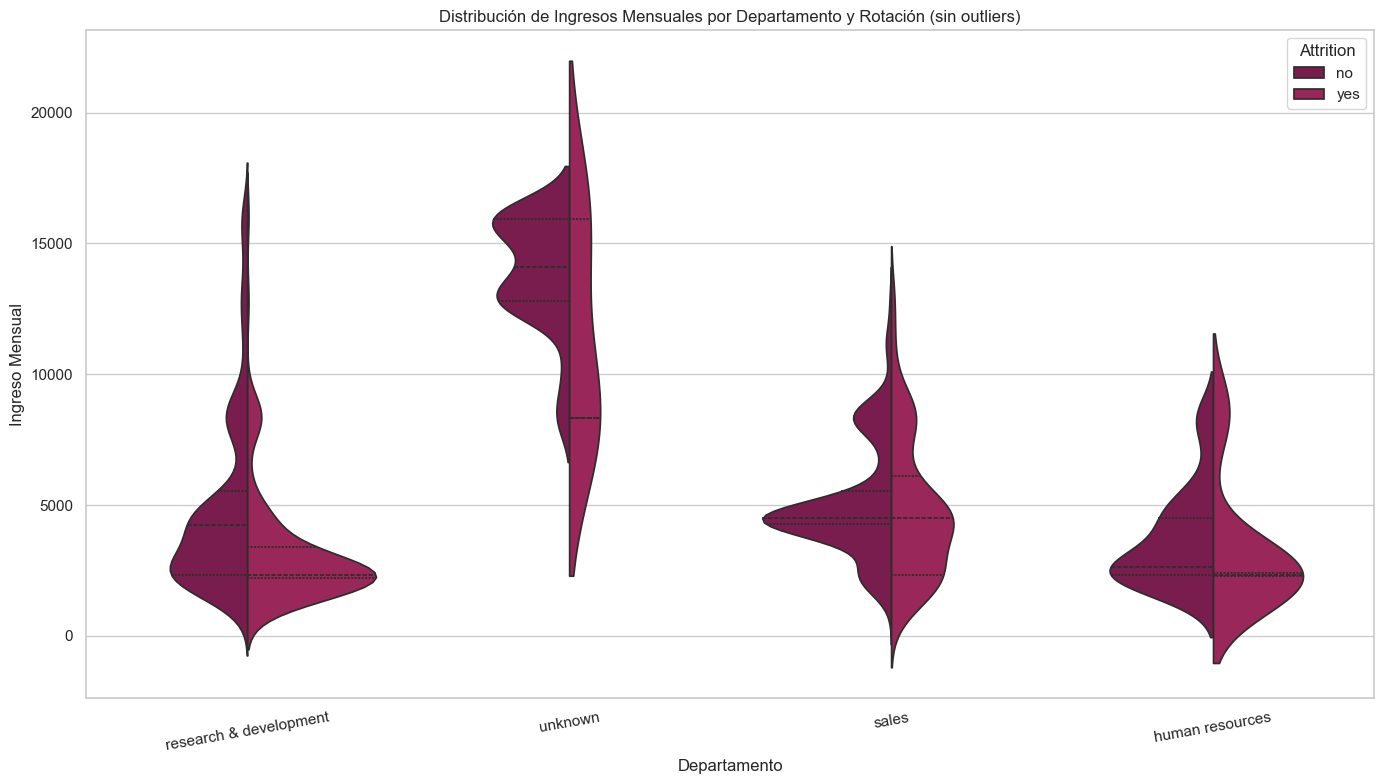

In [65]:
# Función para eliminar outliers usando IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Crear un nuevo DataFrame sin los outliers en 'monthlyincome'
df_no_outliers = remove_outliers(df, 'monthlyincome')

# Crear la figura para el gráfico
plt.figure(figsize=(14, 8))

# Generar el gráfico de violín
# split=True divide cada violín para comparar el 'hue' (attrition)
# inner='quartile' muestra las líneas de los cuartiles dentro del violín
sns.violinplot(x='department', y='monthlyincome', hue='attrition', data=df_no_outliers, split=True, inner='quartile')

# Configurar título y etiquetas
plt.title('Distribución de Ingresos Mensuales por Departamento y Rotación (sin outliers)')
plt.xlabel('Departamento')
plt.ylabel('Ingreso Mensual')
plt.legend(title='Attrition')
plt.xticks(rotation=10)
plt.tight_layout()

# Guardar el gráfico
plt.savefig('income_department_attrition_violin.png')

print('Gráfico de violín guardado como income_department_attrition_violin.png')

Para seguir con nuestra búsqueda del bienestar, ahora hemos decidido centrarnos en el salario. 

Como podemos observar cada  "violín" está partido en dos: la mitad izquierda representa a los empleados que no rotaron  y la otra mitad  a los que sí.

En tres de los cuatro departamentos, la parte del violín de los que rotaron está visiblemente más concentrada en la zona de ingresos bajos. De ahí que sea más ancha en la parte inferior de la escala salarial.

  Igualmente en el Departamento de `research & development` la tendencia también se cumple, la distribución de salarios en el lado de los que no rotaron es más amplia, alcanzando ingresos más altos. Sin embargo, los que rotaron también se concentran en la franja salarial inferior.

Este análisis departamental nos confirma que, si bien el performancerating es clave para los aumentos, la estructura salarial de cada departamento juega un papel fundamental en la  rotación,  
lo que valida la hipótesis de que la compensación económica es un pilar central en la estrategia de retención de talento de la empresa."



### 7. Antigüedad en la Empresa ('yearsatcompany')

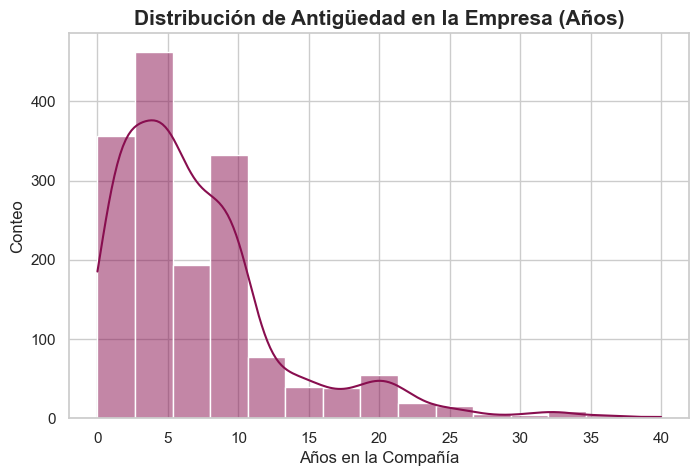

In [66]:
# 1. Crear la figura (lienzo) para el gráfico
plt.figure(figsize=(8, 5))

# 2. Generar el histograma (histplot)
sns.histplot(
    data=df,         # Especifica el DataFrame 'df'.
    x='yearsatcompany', # La variable numérica a distribuir se coloca en el EJE X.
    bins=15,         # Divide el rango de 'yearsatcompany' en 15 contenedores (barras)
                     # de igual ancho para contar las frecuencias. Un número moderado
                     # de bins ayuda a ver la forma de la distribución.
    kde=True         # **Clave:** Añade una Estimación de Densidad de Kernel (KDE).
                     # El KDE superpone una línea curva suave sobre las barras del histograma
                     # que representa la función de densidad de probabilidad subyacente de los datos.
)

# 3. Personalizar los títulos y etiquetas
plt.title('Distribución de Antigüedad en la Empresa (Años)', fontsize=15, fontweight='bold')
plt.xlabel('Años en la Compañía')
plt.ylabel('Conteo')

# 4. Mostrar el gráfico
plt.show()

Este histogrma muestra con qué frecuencia los empleados tienen cierta cantidad de años en la empresa. 

El gráfico muestra que la mayoría de los empleados tienen pocos años en la empresa, con un pico cerca de los 1-5 años. A medida que la antigüedad aumenta, la frecuencia disminuye, lo cual es típico en muchas organizaciones. 

Conclusiones: 

- Empresa joven o en crecimiento:

    La gráfica sugiere que la empresa ha contratado masivamente en los últimos 5 años, pero no retiene a la mayoría de sus empleados más allá de ese período. Esto podría indicar:

- Una cultura de alta rotación: 

    Falta de oportunidades de crecimiento para empleados con experiencia.
    Posible insatisfacción en etapas tempranas (ej: salarios, condiciones laborales).

- Falta de empleados "veteranos":

    La escasez de empleados con 10+ años de antigüedad sugiere que la empresa pierde talento a mediano plazo. Esto puede afectar:

        La transmisión de conocimiento interno.
        La estabilidad de equipos críticos.

- Oportunidad para programas de retención:

    Los empleados con 3-5 años de antigüedad son un grupo clave: si no se sienten valorados, podrían irse. Estrategias como:

        Planes de carrera.
        Bonos por antigüedad.
        Flexibilidad laboral.



____

### 8. Salario vs Antigüedad:

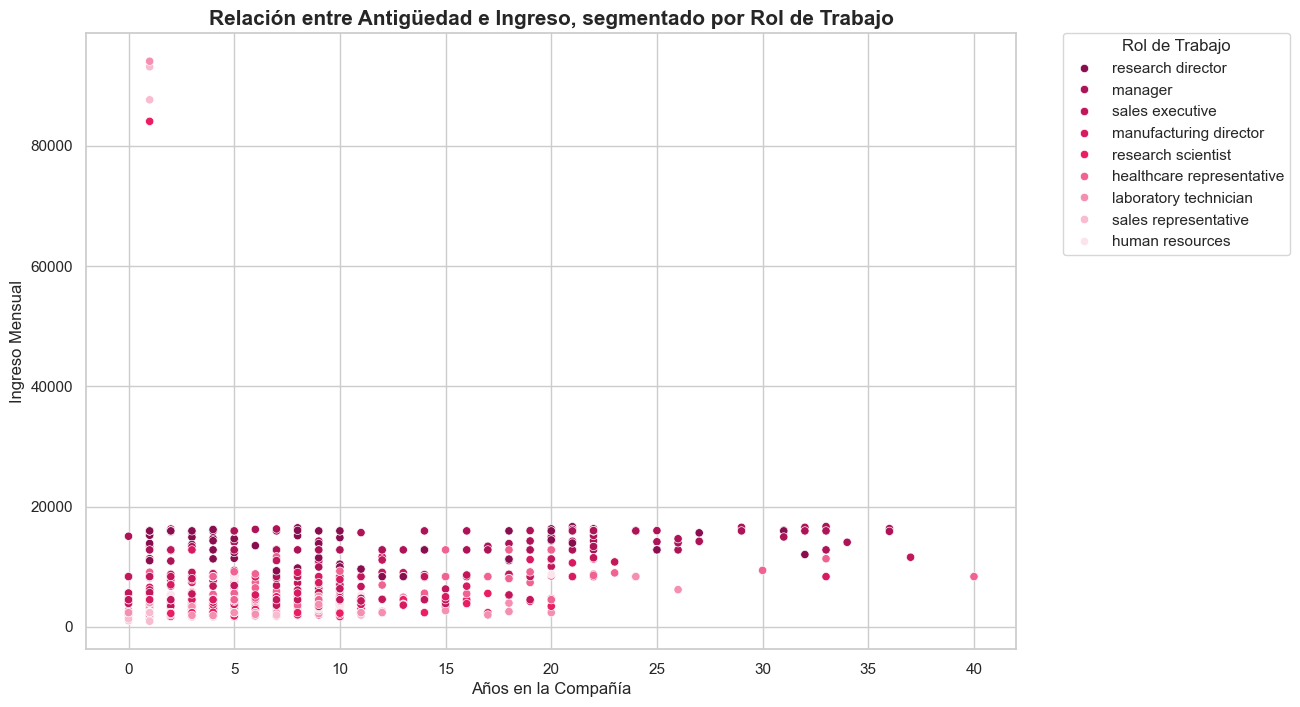

In [67]:
# 1. Crear la figura para el gráfico
plt.figure(figsize=(12, 8))

# 2. Generar el gráfico de dispersión (scatterplot)
sns.scatterplot(
    data=df,              # Especifica el DataFrame 'df'.
    x='yearsatcompany',   # Variable en el Eje X (Antigüedad, variable numérica continua).
    y='monthlyincome',    # Variable en el Eje Y (Ingreso Mensual, variable numérica continua).
    hue='jobrole'         # **Clave:** Utiliza el Rol de Trabajo para colorear cada punto.
                          # Esto crea un conjunto de puntos de colores distintos para cada
                          # categoría de 'jobrole', mostrando la relación para cada rol
                          # de manera individual.
)
# El scatterplot muestra si existe una correlación positiva (a mayor antigüedad, mayor ingreso)
# y permite ver si esta correlación difiere drásticamente entre los roles.


# 3. Personalización Implícita y Pendiente
# Nota: Faltan las líneas explícitas de plt.title, plt.xlabel, plt.ylabel, y plt.legend.
# Matplotlib y Seaborn suelen generar etiquetas básicas automáticamente a partir de los
# nombres de las columnas, pero añadir las líneas es una mejor práctica:

plt.title('Relación entre Antigüedad e Ingreso, segmentado por Rol de Trabajo', fontsize=15, fontweight='bold')
plt.xlabel('Años en la Compañía')
plt.ylabel('Ingreso Mensual')
plt.legend(title='Rol de Trabajo', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # Ajustar la leyenda si hay muchos roles

# 4. Mostrar el gráfico
plt.show() # Esta línea es esencial para mostrar el resultado.


In [69]:
df[df['monthlyincome'] < 80000]

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,datebirth,salary,remotework
0,51,no,non-travel,2015.72,research & development,6,3,unknown,1,1,m,251.96500,3,5,research director,3,unknown,16280.830000,42330.17,7,no,13,3.0,3,full time,0,NaN,5,3.0,20,15,15,1972,195370.00,yes
1,52,no,non-travel,2063.39,unknown,1,4,life sciences,2,3,m,257.92375,2,5,manager,3,unknown,16665.833333,43331.17,0,unknown,14,3.0,1,full time,1,34.0,5,3.0,33,11,9,1971,199990.00,yes
2,42,no,travel_rarely,1984.25,unknown,4,2,technical degree,3,3,m,248.03125,3,5,manager,4,married,16026.666667,41669.33,1,no,11,3.0,4,full time,0,22.0,3,3.0,22,11,15,1981,192320.00,yes
3,47,no,travel_rarely,1771.40,research & development,2,4,medical,4,1,f,221.42500,3,4,research director,3,married,14307.500000,37199.50,3,unknown,19,3.0,2,full time,2,NaN,2,3.0,20,5,6,1976,171690.00,no
4,46,no,non-travel,1582.77,sales,3,3,technical degree,5,1,f,197.84625,4,4,sales executive,1,divorced,12783.920000,33238.20,2,no,12,3.0,4,full time,1,NaN,5,3.0,19,2,8,1977,153407.04,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609,36,yes,travel_rarely,1065.28,sales,3,1,life sciences,1610,3,m,133.16000,2,3,sales executive,4,married,8604.170000,22370.83,1,unknown,11,NaN,1,full time,1,NaN,6,3.0,16,3,7,1987,103250.00,no
1610,45,no,non-travel,458.82,research & development,4,2,unknown,1611,3,m,57.35250,3,2,laboratory technician,2,unknown,3705.830000,9635.17,1,unknown,12,3.0,2,part time,0,NaN,5,2.0,9,0,8,1978,44470.00,yes
1611,39,no,travel_rarely,1032.49,sales,13,5,unknown,1612,1,m,129.06125,4,3,sales executive,3,single,8339.320000,21682.23,0,no,18,3.0,4,part time,0,9.0,3,3.0,8,0,7,1984,100071.84,yes
1612,36,no,non-travel,556.26,sales,8,4,technical degree,1613,1,m,69.53250,3,2,sales executive,4,divorced,4492.840000,11681.39,4,no,13,NaN,4,part time,2,12.0,3,3.0,7,0,7,1987,53914.11,yes


___

### 9. Attrition vs Jobsatisfaction:

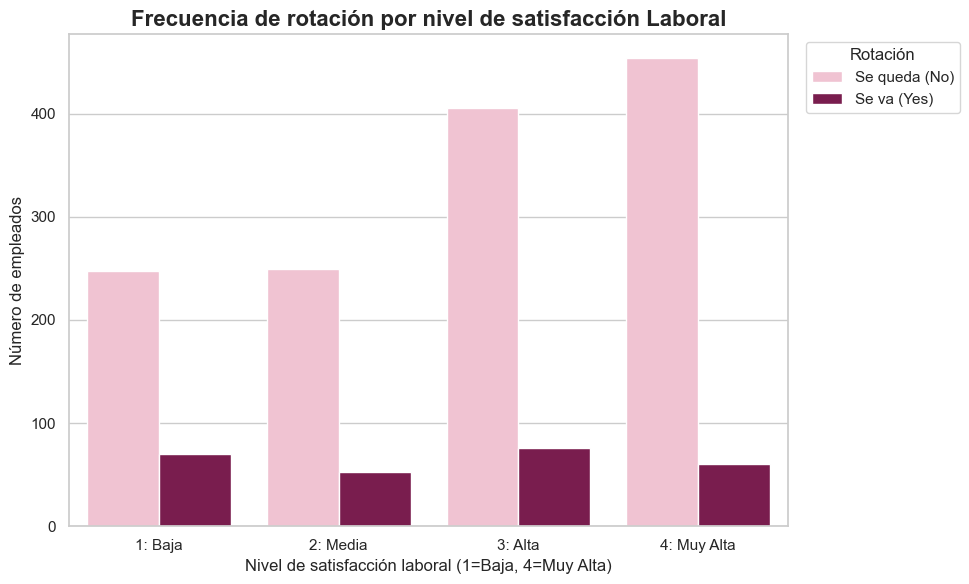

In [70]:
PALETA_SATISFACCION = {
    'yes': '#880E4F',  # Rosa Oscuro: Rotación (Riesgo)
    'no': '#F8BBD0'    # Rosa Claro: Permanencia (Seguridad)
}

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# x: Satisfacción Laboral (categorías 1 a 4)
# hue: Rotación (divide las barras por Attrition)
sns.countplot(
    x='jobsatisfaction',
    hue='attrition',
    data=df,
    palette=PALETA_SATISFACCION
)

plt.title('Frecuencia de rotación por nivel de satisfacción Laboral', fontsize=16, weight='bold')
plt.xlabel('Nivel de satisfacción laboral (1=Baja, 4=Muy Alta)', fontsize=12)
plt.ylabel('Número de empleados', fontsize=12)

# Reemplazamos los números del eje X con etiquetas descriptivas
plt.xticks(ticks=[0, 1, 2, 3], labels=['1: Baja', '2: Media', '3: Alta', '4: Muy Alta'])

# Colocamos la leyenda fuera del gráfico para que no tape las barras
plt.legend(title='Rotación', labels=['Se queda (No)', 'Se va (Yes)'], loc='upper right', bbox_to_anchor=(1.25, 1))

plt.tight_layout()
plt.show()

____

### 10. Ingreso mensual vs rotación

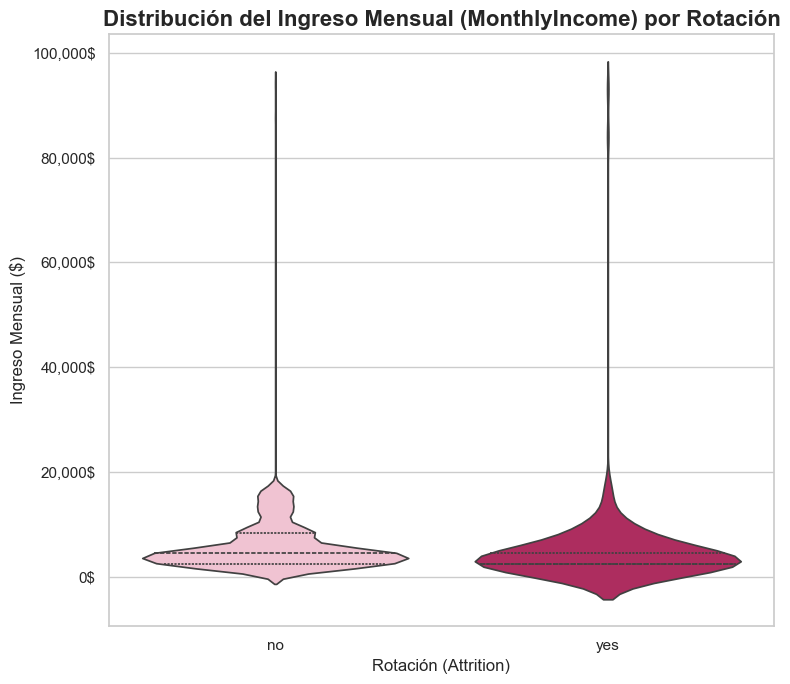

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker # <<-- ¡Añadir esta línea para importar 'ticker'!

# 1. Definición de la paleta de colores
PALETA_INGRESO = {
    'yes': '#C2185B',  # Rosa Oscuro: Rotación (Riesgo)
    'no': '#F8BBD0'    # Rosa Claro: Permanencia (Seguridad)
}

# 2. Configuración del estilo
sns.set_style("whitegrid")
plt.figure(figsize=(8, 7))
# Define el tamaño de la figura.

# 3. Creación del Violinplot
sns.violinplot(
    x='attrition',
    y='monthlyincome',
    data=df,
    hue='attrition', # Usa la variable Attrition para colorear las violines.
    palette=PALETA_INGRESO, # Aplica la paleta de colores personalizada.
    legend=False,           # Oculta la leyenda, ya que 'hue' y 'x' son la misma variable.
    inner='quartile'        # Muestra las líneas Q1, Mediana y Q3 dentro de la forma de violín.
)
# El Violinplot es una excelente combinación de Boxplot y Histograma, mostrando la
# densidad de la distribución salarial para cada grupo de rotación. 

# 4. Personalización y formato
plt.title('Distribución del Ingreso Mensual (MonthlyIncome) por Rotación', fontsize=16, weight='bold')
# Establece el título.

plt.xlabel('Rotación (Attrition)', fontsize=12)
# Etiqueta del eje X.

plt.ylabel('Ingreso Mensual ($)', fontsize=12)
# Etiqueta del eje Y.

# 5. Formato del Eje Y (Ahora Funcional)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}$'))
# Usa 'ticker.StrMethodFormatter' para formatear los números del eje Y:
# - '{x:,' añade el separador de miles (coma).
# - '.0f}' asegura que no haya decimales.
# - '$' añade el símbolo de dólar.

plt.tight_layout()
# Ajusta el layout para asegurar que no se corten las etiquetas.

plt.show()
# Muestra la visualización final.

_____

### 11. Frecuencia de rotación por satisfacción y equilibrio

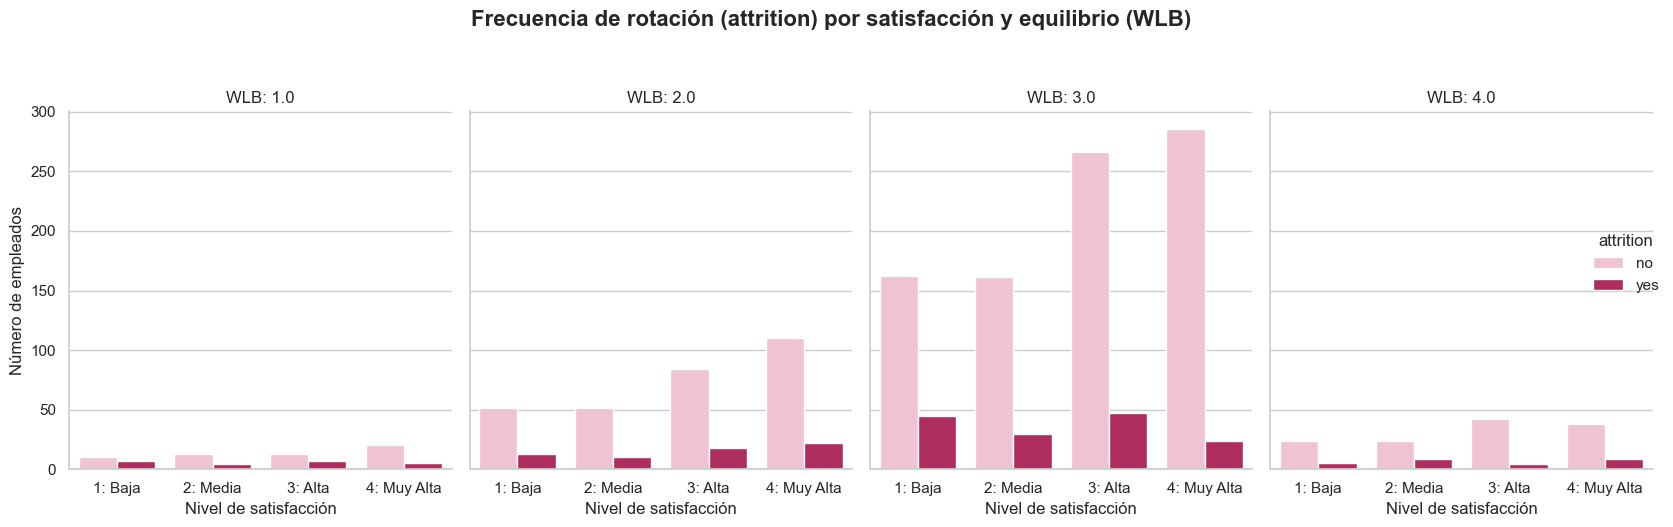

In [72]:
PALETA_WLB = {
    'yes': '#C2185B',  # Rosa Oscuro: Rotación (Riesgo)
    'no': '#F8BBD0'    # Rosa Claro: Permanencia (Seguridad)
}

g = sns.catplot(
    data=df,
    x='jobsatisfaction', # Eje principal
    hue='attrition',     # Subdivisión de barras (Color)
    col='worklifebalance', # ¡CRUCIAL! Crea una columna de gráficos para cada nivel
    kind='count',        # Tipo de gráfico: Countplot (frecuencia)
    palette=PALETA_WLB,
    height=5,            # Altura de cada gráfico
    aspect=0.8           # Proporción de aspecto (ancho/alto)
)

g.figure.suptitle('Frecuencia de rotación (attrition) por satisfacción y equilibrio (WLB)', 
               fontsize=16, weight='bold', y=1.05) # Título general

g.set_axis_labels("Nivel de satisfacción", "Número de empleados")
g.set_titles("WLB: {col_name}") # Título para cada columna: WLB: 1, WLB: 2, etc.

plt.xticks(ticks=[0, 1, 2, 3], labels=['1: Baja', '2: Media', '3: Alta', '4: Muy Alta'])

plt.tight_layout()
plt.show()

En esta visualización, no estamos viendo una sola variable, sino la interacción de tres factores críticos: la satisfacción laboral, el equilibrio entre la vida laboral y personal, y su impacto combinado en la rotación de personal.

Cada uno de los cuatro gráficos representa un nivel distinto de equilibrio vida-trabajo.

Dentro de cada uno, las barras nos muestran cuántos
  empleados, para cada nivel de satisfacción, decidieron quedarse o irse."

  "El análisis de estos gráficos nos lleva a una conclusión estratégica fundamental para la empresa:

   1. La insatisfacción laboral es el principal predictor de rotación. 
   2. El equilibrio vida-trabajo (WLB) actúa como un 'multiplicador de riesgo'. Un mal WLB acelera la rotación en todos los frentes, incluso entre el talento que está contento con sus tareas. 

Por tanto, para reducir la rotación de manera efectiva, la empresa no solo debe enfocarse en aumentar la satisfacción, sino que debe tratar las políticas de equilibrio vida-trabajo con la misma urgencia y prioridad."

Y con esta última reflexión doy paso a mi compañera Ona que nos hablará de los siguientes pasos que vamos a tomar.

____

### 12. Relación entre Evaluación de Desempeño y Aumento Salarial

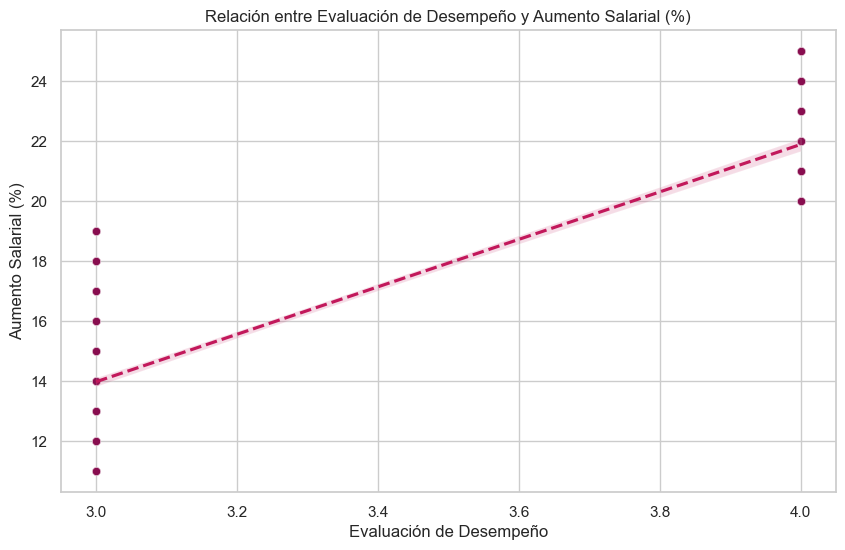

In [ ]:
# 1. Crear la figura (lienzo) para el gráfico
plt.figure(figsize=(10, 6))

# 2. Generar el gráfico de dispersión (scatterplot)
sns.scatterplot(
    data=df,              # Especifica el DataFrame 'df'.
    x='performancerating',   # Variable en el Eje X (Calificación de Desempeño).
    y='percentsalaryhike', # Variable en el Eje Y (Porcentaje de Aumento Salarial).
    alpha=0.6             # **Clave:** Establece la transparencia de los puntos a 0.6.
                          # Esto es útil si hay muchos puntos superpuestos (overplotting),
                          # permitiendo ver las áreas donde se concentra la mayor densidad de datos.
)

# 3. Añadir la línea de regresión (regplot)
sns.regplot(
    data=df,              # Utiliza los mismos datos.
    x='performancerating',
    y='percentsalaryhike',
    scatter=False,        # **Clave:** Solo dibuja la línea de regresión, no los puntos (ya dibujados arriba).
    color='#C2185B',      # Define un color rojo oscuro personalizado para la línea.
    line_kws={'linestyle':'--'} # Define la línea como discontinua (dashed).
)

# 4. Personalizar los títulos y etiquetas
plt.title('Relación entre Evaluación de Desempeño y Aumento Salarial (%)', fontsize=15, fontweight='bold')
plt.xlabel('Evaluación de Desempeño')
plt.ylabel('Aumento Salarial (%)')

# 5. Añadir cuadrícula y mostrar
plt.grid(True)

plt.show()

Gráfico generado como performance_salary_hike.png


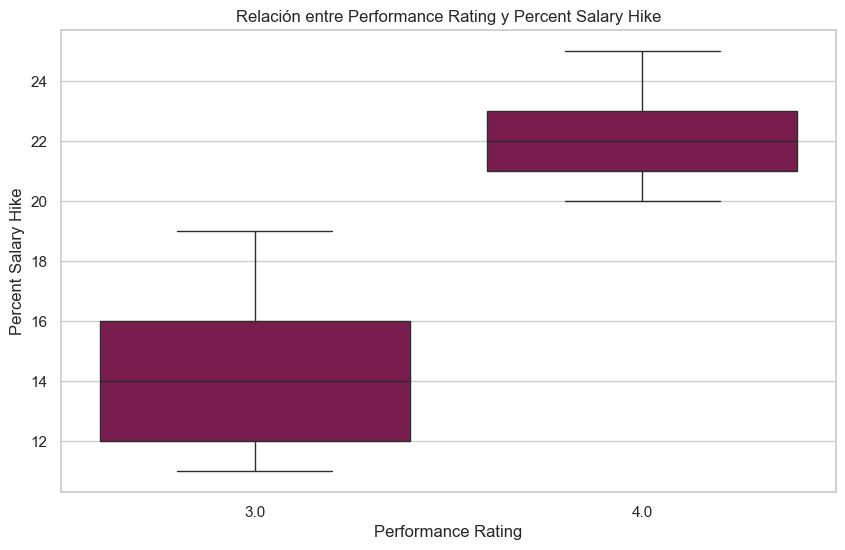

In [ ]:
# Crear la figura y el eje para el gráfico
plt.figure(figsize=(10, 6))
sns.boxplot(x='performancerating', y='percentsalaryhike', data=df)

 # Añadir título y etiquetas a los ejes
plt.title('Relación entre Performance Rating y Percent Salary Hike')
plt.xlabel('Performance Rating')
plt.ylabel('Percent Salary Hike')
# Guardar el gráfico en un archivo
plt.savefig('performance_salary_hike.png')
# Mostrar el gráfico (opcional, si se ejecuta en un entorno interactivo como Jupyter)
# plt.show()
print('Gráfico generado como performance_salary_hike.png')

Conclusiones: 

- Tendencia positiva clara: La línea de tendencia (roja) sube de izquierda a derecha: a mayor evaluación de desempeño, mayor aumento salarial. La empresa **premia el desempeño con aumentos salariales**, lo que es una buena práctica.
Recomendación: Mantener esta política y comunicarla claramente para motivar a los empleados.

- Correlación moderada: Los puntos no están perfectamente alineados, pero la tendencia es visible. Aunque hay una relación, no es determinista: otros factores pueden influir en el aumento salarial.

- Outliers: Algunos empleados con evaluación baja (ej: 3.0) reciben aumentos altos (ej: 18-20%). Posibles excepciones o errores en la evaluación. Revisar casos individuales para asegurar equidad.

In [ ]:
# Promedio de aumento salarial por departamento
promedio_depto = df.groupby('department')['percentsalaryhike'].mean().round(2)
print("\nPromedio de aumento salarial por departamento:\n", promedio_depto)


Promedio de aumento salarial por departamento:
 department
human resources           14.60
research & development    15.24
sales                     15.10
unknown                   15.05
Name: percentsalaryhike, dtype: float64


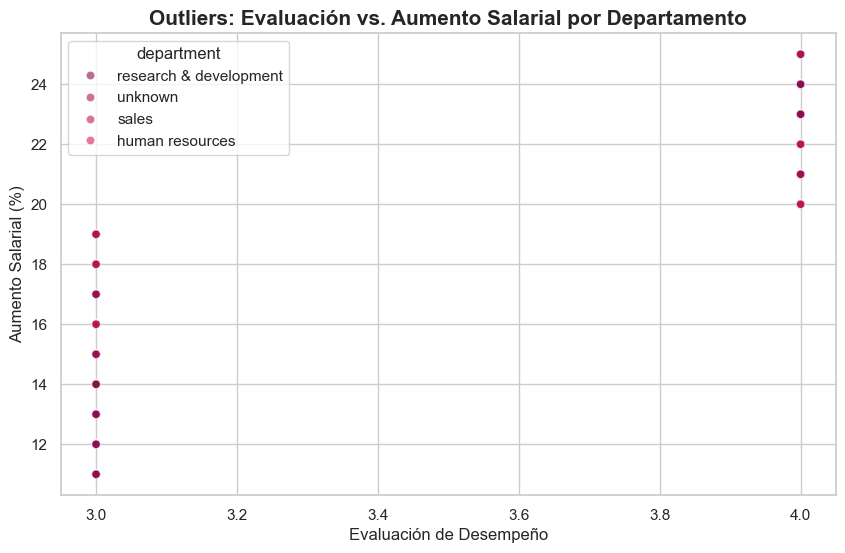

In [73]:
# 1. Crear la figura (lienzo) para el gráfico
plt.figure(figsize=(10, 6))

# 2. Generar el gráfico de dispersión segmentado (scatterplot)
sns.scatterplot(
    data=df,              # Especifica el DataFrame 'df'.
    x='performancerating',   # Variable en el Eje X (Calificación de Desempeño).
    y='percentsalaryhike', # Variable en el Eje Y (Porcentaje de Aumento Salarial).
    hue='department',      # **Clave:** Utiliza el Departamento para asignar un color distinto a cada punto.
                           # Esto permite ver la nube de puntos por separado para cada área de la empresa.
    alpha=0.6              # Establece la transparencia de los puntos a 0.6.
                           # Esto ayuda a manejar la superposición de puntos y visualizar
                           # las áreas de mayor densidad para cada color/departamento.
)

# 3. Personalizar los títulos y etiquetas
plt.title('Outliers: Evaluación vs. Aumento Salarial por Departamento', fontsize=15, fontweight='bold')

# Es buena práctica incluirlas:
plt.xlabel('Evaluación de Desempeño')
plt.ylabel('Aumento Salarial (%)')

# 4. Añadir cuadrícula y mostrar
plt.grid(True)

plt.show()


Conclusión:

Los outliers reciben aumentos salariales significativamente más altos que el promedio de sus departamentos, especialmente en Human Resources (+9.4%).

Posibles Razones para los Outliers

a. Research & Development

- Roles críticos: Empleados como "research director" o "healthcare representative" pueden tener habilidades difíciles de reemplazar.

- Antigüedad: Muchos tienen 15+ años en la empresa, lo que sugiere ajustes por lealtad o corrección de salarios históricos.

- Retención de talento: La empresa puede estar usando aumentos salariales para evitar que estos empleados se vayan a la competencia.

b. Sales

- Alta atrición: Como vimos en gráficas anteriores, Sales tiene una alta tasa de atrición. Los aumentos altos pueden ser una estrategia para retener talento.

- Comisiones y bonos: Algunos empleados pueden tener aumentos altos debido a logros excepcionales en ventas, aunque su evaluación general sea 3.0.


c. Human Resources

- Rol único: El outlier en HR puede ser un empleado con un rol especializado o experiencia única en la empresa.

- Corrección de salario: Posible ajuste para alinear su salario con el mercado o compensar años de servicio.


d. Unknown

- Clasificación incorrecta: Es posible que estos empleados pertenezcan a otro departamento o estén en transición.


___

### 13. Aumento Salarial por Desempeño y Antigüedad

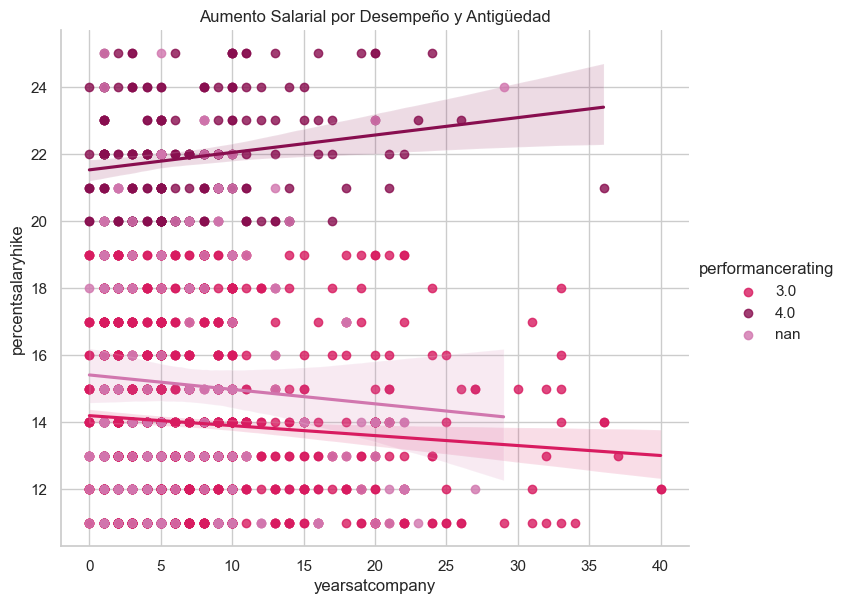

In [76]:
# 1. Definición de la paleta de colores (Incompleta, pero muestra el concepto)
PALETA_WLB = {
    '4.0': '#880E4F', # Color para el Nivel de Desempeño 4 (Ej: Rendimiento Excepcional)
    '3.0': "#D81B60", # Color para el Nivel de Desempeño 3 (Ej: Cumple Expectativas)
    'nan': "#D176AE", # Color para valores faltantes ('nan' o no definidos en la paleta)
    # Nota: Esta paleta solo tiene 3 niveles. Asumo que es un ejemplo, ya que el lmplot
    # intentará graficar todos los valores únicos de 'performancerating'.
}

# 2. Asegurar el tipo de dato para la segmentación (hue)
df['performancerating'] = df['performancerating'].astype(str)

# 3. Generar el Gráfico de Regresión Lineal (lmplot)
sns.lmplot(
    data=df,              # Especifica el DataFrame 'df'.
    x='yearsatcompany',   # Variable independiente en el Eje X.
    y='percentsalaryhike', # Variable dependiente en el Eje Y.
    hue='performancerating', # **Clave:** Crea una línea de regresión y puntos de dispersión
                             # separados para cada nivel de desempeño.
    height=6,             # Define la altura del gráfico (en pulgadas).
    aspect=1.2,           # Define la relación de aspecto (ancho/alto = 1.2), haciendo el gráfico más ancho.
    palette=PALETA_WLB    # Aplica los colores personalizados definidos en PALETA_WLB.
)

# 4. Personalizar el título
plt.title('Aumento Salarial por Desempeño y Antigüedad')

# 5. Mostrar el gráfico
plt.show()

Conclusiones: 

- Aumento salarial vs. antigüedad (naranja): La línea de tendencia para performancerating = 4.0 sube ligeramente con los años en la empresa. Los empleados con alto desempeño ven un aumento gradual en su compensación a lo largo del tiempo.

- Aumento salarial vs. antigüedad (azul): La línea de tendencia para performancerating = 3.0 permanece casi plana con los años. Los empleados con desempeño medio no ven un aumento significativo en su salario con la antigüedad.

Esto sugiere que la empresa valora y recompensa el desempeño sobresaliente a lo largo del tiempo.  Los empleados ven que su esfuerzo y desempeño son reconocidos, lo que puede aumentar la retención.

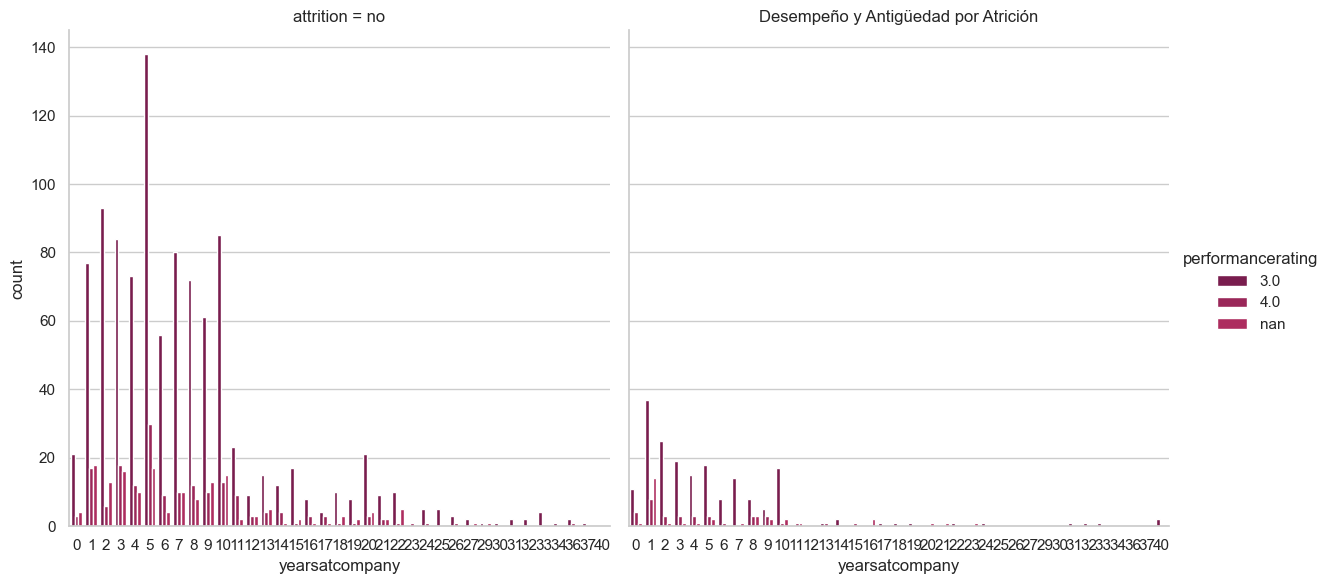

In [77]:
sns.catplot(data=df, x='yearsatcompany', col='attrition', hue='performancerating', kind='count', height=6, aspect=1)
plt.title('Desempeño y Antigüedad por Atrición')
plt.show()

# Columnas: Separadas por atrición (attrition):
# Izquierda: Empleados que no se fueron (attrition = no).
# Derecha: Empleados que sí se fueron (attrition = yes).


Conclusión

La empresa premia el alto desempeño con aumentos salariales más altos y progresivos.

Los empleados con desempeño medio no ven un crecimiento significativo en su salario con la antigüedad, lo que puede afectar su motivación y retención.


Recomendación final:

- Equilibrar la compensación para empleados con desempeño medio pero con alta antigüedad.

- Comunicar claramente los criterios de aumento salarial para mantener la motivación y equidad.
